# Task 1

---

## Web scraping and analysis
### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself as said in the problem statement

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100
## making a list of reviews stored in a list container
reviews = []

In [ ]:
# for i in range(1, pages + 1):
for i in range(1, 37 + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()


,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...


In [ ]:
df

,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...
...,...
3619,This was a bmi Regional operated flight on a R...
3620,LHR to HAM. Purser addresses all club passenge...
3621,My son who had worked for British Airways urge...
3622,London City-New York JFK via Shannon on A318 b...


# Cleaning the text

In [ ]:
import re
#I am trying to remove all special characters from the reviews column
def clean(text):
  text=re.sub("[^A-Za-z]+"," ",str(text))
  return text
# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...,Trip Verified Easy check in a T Galleries sou...
1,"Not Verified | Flight delayed by an hour, it ...",Not Verified Flight delayed by an hour it happ...
2,Not Verified | The staff are very rude and not...,Not Verified The staff are very rude and not t...
3,✅ Trip Verified | Good domestic flight operat...,Trip Verified Good domestic flight operated b...
4,Not Verified | Failed at all basic travel fund...,Not Verified Failed at all basic travel fundam...


#  Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences byusing an unsupervised
 algorithm to build a model for abbreviation words, collocations, and words that
 start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
#The nltk.corpus package defines a collection of corpus reader classes,
#which can be used to access the contents of a diverse set of corpora.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,✅ Trip Verified | Easy check in a T5. Galleri...,Trip Verified Easy check in a T Galleries sou...,"[(Trip, n), (Verified, n), (Easy, n), (check, ..."
1,"Not Verified | Flight delayed by an hour, it ...",Not Verified Flight delayed by an hour it happ...,"[(Verified, n), (Flight, n), (delayed, v), (ho..."
2,Not Verified | The staff are very rude and not...,Not Verified The staff are very rude and not t...,"[(Verified, v), (staff, n), (rude, a), (traine..."
3,✅ Trip Verified | Good domestic flight operat...,Trip Verified Good domestic flight operated b...,"[(Trip, n), (Verified, n), (Good, n), (domesti..."
4,Not Verified | Failed at all basic travel fund...,Not Verified Failed at all basic travel fundam...,"[(Verified, n), (Failed, v), (basic, a), (trav..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,✅ Trip Verified | Easy check in a T5. Galleri...,Trip Verified Easy check in a T Galleries sou...,"[(Trip, n), (Verified, n), (Easy, n), (check, ...",Trip Verified Easy check Galleries south Nor...
1,"Not Verified | Flight delayed by an hour, it ...",Not Verified Flight delayed by an hour it happ...,"[(Verified, n), (Flight, n), (delayed, v), (ho...",Verified Flight delay hour happen biggie us ...
2,Not Verified | The staff are very rude and not...,Not Verified The staff are very rude and not t...,"[(Verified, v), (staff, n), (rude, a), (traine...",Verified staff rude train properly exception...
3,✅ Trip Verified | Good domestic flight operat...,Trip Verified Good domestic flight operated b...,"[(Trip, n), (Verified, n), (Good, n), (domesti...",Trip Verified Good domestic flight operate B...
4,Not Verified | Failed at all basic travel fund...,Not Verified Failed at all basic travel fundam...,"[(Verified, n), (Failed, v), (basic, a), (trav...",Verified Failed basic travel fundamental fli...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,✅ Trip Verified | Easy check in a T5. Galleri...,Trip Verified Easy check Galleries south Nor...
1,"Not Verified | Flight delayed by an hour, it ...",Verified Flight delay hour happen biggie us ...
2,Not Verified | The staff are very rude and not...,Verified staff rude train properly exception...
3,✅ Trip Verified | Good domestic flight operat...,Trip Verified Good domestic flight operate B...
4,Not Verified | Failed at all basic travel fund...,Verified Failed basic travel fundamental fli...
...,...,...
3619,This was a bmi Regional operated flight on a R...,bmi Regional operate flight RJ Manchester He...
3620,LHR to HAM. Purser addresses all club passenge...,LHR HAM Purser address club passenger name b...
3621,My son who had worked for British Airways urge...,son work British Airways urge fly British Ai...
3622,London City-New York JFK via Shannon on A318 b...,London City New York JFK via Shannon really ...


# Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | Easy check in a T5. Galleri...,Trip Verified Easy check in a T Galleries sou...,"[(Trip, n), (Verified, n), (Easy, n), (check, ...",Trip Verified Easy check Galleries south Nor...,0.9415,Positive
1,"Not Verified | Flight delayed by an hour, it ...",Not Verified Flight delayed by an hour it happ...,"[(Verified, n), (Flight, n), (delayed, v), (ho...",Verified Flight delay hour happen biggie us ...,-0.2235,Negative
2,Not Verified | The staff are very rude and not...,Not Verified The staff are very rude and not t...,"[(Verified, v), (staff, n), (rude, a), (traine...",Verified staff rude train properly exception...,-0.7698,Negative
3,✅ Trip Verified | Good domestic flight operat...,Trip Verified Good domestic flight operated b...,"[(Trip, n), (Verified, n), (Good, n), (domesti...",Trip Verified Good domestic flight operate B...,0.9420,Positive
4,Not Verified | Failed at all basic travel fund...,Not Verified Failed at all basic travel fundam...,"[(Verified, n), (Failed, v), (basic, a), (trav...",Verified Failed basic travel fundamental fli...,-0.9019,Negative


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    2129
Negative    1119
Neutral      376
Name: Analysis, dtype: int64

# Visual Representation of data for management decisions


([<matplotlib.patches.Wedge at 0x7a2480c48880>,
 [Text(-0.2984926267917288, 1.0587266652686962, 'Positive'),
  Text(-0.056236541127427486, -1.0985615373942523, 'Negative'),
  Text(1.2789187779263977, -0.4322808802934145, 'Neutral')])

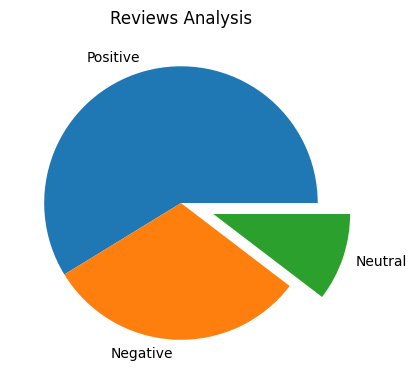

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25))

In [ ]:
df.to_csv("BA_reviews.csv")

# FORMING A WORD CLOUD

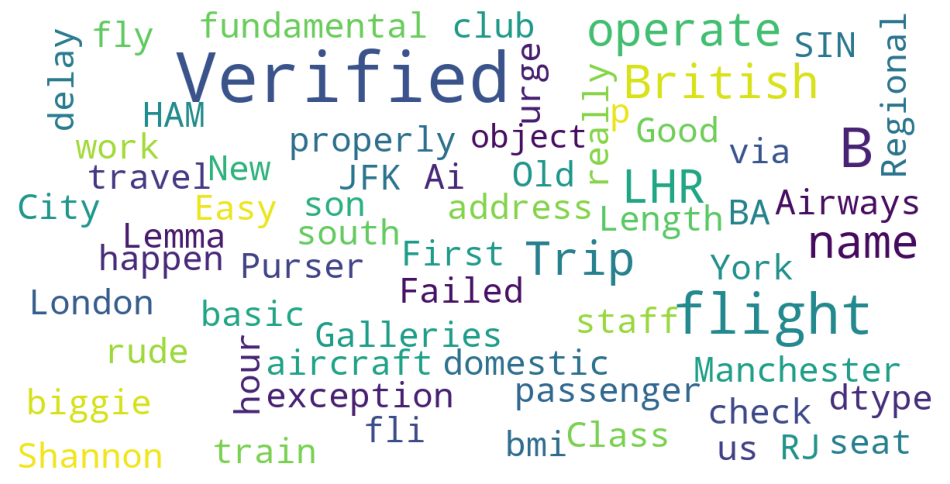

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

# *************END OF TASK 1*********

# TASK 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import chardet
result = chardet.detect(df)

TypeError: ignored